# HW4_Part 2_Citi Bikes

In [3]:
# Stating all the packages here
from __future__  import print_function, division
import matplotlib.pylab as pl
import pandas as pd
import numpy as np
import os

%pylab inline

if os.getenv ('PUIDATA') is None:
    print ("Must set env variable PUIDATA")


import os
import json
#s = json.load( open(os.getenv('PUI2016') + "/fbb_matplotlibrc.json") )
#pl.rcParams.update(s)

Populating the interactive namespace from numpy and matplotlib


## Statements
In summer, there tends to be more tourists in New York City. Especially, during the weekend, with less traffic we can expect more short-term riders (i.e. 24-your or 3-day pass; recorded as customer in usertype). In this assignment, I would use the month August representing summer.  Therefore, I am expecting a higher porportion of customer riders during the weekend in August than weekdays. The studying year is 2017.

Another reason I chose August is because, August does not have a long weekend and therefore, the weekday versus weekend comparison can be relatively more clearer. 

### Null Hypothesis

In 2017 August, The proportion of short-term users during the weekend are not significantly higher than the proportion of short-term users during weekdays. 

### Alternative Hypothesis

In 2017 August, The proportion of short-term users during the weekend are higher than the proportion of short-term users during weekdays. 

# _$H_0$_ : $\frac{R_{\mathrm{cus-Weekend}}}{R_{\mathrm{total-Weekend}}} <= \frac{R_{\mathrm{cus-Weekday}}}{R_{\mathrm{total-Weekday}}}$
# _$H_1$_ : $\frac{R_{\mathrm{cus-Weekend}}}{R_{\mathrm{total-Weekend}}} > \frac{R_{\mathrm{cus-Weekday}}}{R_{\mathrm{total-Weekday}}}$

or identically:

# _$H_0$_ : $\frac{R_{\mathrm{cus-Weekend}}}{R_{\mathrm{total-Weekend}}} - \frac{R_{\mathrm{cus-Weekday}}}{R_{\mathrm{total-Weekday}}} <= 0 $
# _$H_1$_ : $\frac{R_{\mathrm{cus-Weekend}}}{R_{\mathrm{total-Weekend}}} - \frac{R_{\mathrm{cus-Weekday}}}{R_{\mathrm{total-Weekday}}} > 0$
## The significance level chosen is  $\alpha=0.05$

#### which means i want the probability of getting a result at least as significant as mine to be less then 5%


In [4]:
import pandas as pd
import numpy as py
import os
import sys
import zipfile

## Environmental Prep

In [5]:
puidata = os.getenv("PUIDATA")
if puidata is None:
    os.environ["PUIDATA"] = "%s/PUIdata"%os.getenv("HOME")

In [6]:
#!curl https://s3.amazonaws.com/tripdata/201701-citibike-tripdata.csv.zip > Jan2017citibike.csv.zip
#!curl https://s3.amazonaws.com/tripdata/201708-citibike-tripdata.csv.zip > Aug2017citibike.csv.zip

In [7]:
#2017Augbike = Aug2017citibike.csv.zip.ZipFile(os.getenv("PUIDATA"), 'r')
#2017Augbike.extractall(os.getenv("PUIDATA"))
#2017Augbike.close()
def getCitiBikeCSV(datestring):
    print ("Downloading", datestring)
    ### First I will heck that it is not already there
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        if os.path.isfile(datestring + "-citibike-tripdata.csv"):
            # if in the current dir just move it
            if os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA")):
                print ("Error moving file!, Please check!")
        #otherwise start looking for the zip file
        else:
            if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip"):
                if not os.path.isfile(datestring + "-citibike-tripdata.zip"):
                    os.system("curl -O https://s3.amazonaws.com/tripdata/" + datestring + "-citibike-tripdata.zip")
                ###  To move it I use the os.system() functions to run bash commands with arguments
                os.system("mv " + datestring + "-citibike-tripdata.zip " + os.getenv("PUIDATA"))
            ### unzip the csv 
            os.system("unzip " + os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip")
            ## NOTE: old csv citibike data had a different name structure. 
            if '2014' in datestring:
                os.system("mv " + datestring[:4] + '-' +  datestring[4:] + 
                          "\ -\ Citi\ Bike\ trip\ data.csv " + datestring + "-citibike-tripdata.csv")
            os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA"))
    ### One final check:
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        print ("WARNING!!! something is wrong: the file is not there!")

    else:
        print ("file in place, you can continue")


In [8]:
datestring = '201708'
getCitiBikeCSV(datestring)

file in place, you can continue


In [9]:
!ls $PUIDATA

201501-citibike-tripdata.csv  DCAS_Managed_Building_Fuel_Usage.csv
201501-citibike-tripdata.zip  DSNY_Monthly_Tonnage_Data.csv
201701-citibike-tripdata.csv  gittest_lavz
201702-citibike-tripdata.zip  Jan2017citibike.csv.zip
201708-citibike-tripdata.csv  tonnage.csv
Aug2017citibike.csv.zip       Treasure^C
Bus Data.csv


# CitiBike Data Wangling

In [10]:
#Jan2017=pd.read_csv("%s/201701-citibike-tripdata.csv"%os.getenv("PUIDATA"))
Aug2017 = pd.read_csv(os.getenv("PUIDATA") + "/" + datestring + '-citibike-tripdata.csv')

In [11]:
Aug2017.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,2110,2017-08-01 00:00:00,2017-08-01 00:35:11,470,W 20 St & 8 Ave,40.743453,-74.000040,3289,W 90 St & Amsterdam Ave,40.790179,-73.972889,20954,Subscriber,1978.0,2
1,160,2017-08-01 00:00:10,2017-08-01 00:02:51,348,W Broadway & Spring St,40.724910,-74.001547,151,Cleveland Pl & Spring St,40.722104,-73.997249,15164,Subscriber,1978.0,1
2,1644,2017-08-01 00:00:17,2017-08-01 00:27:41,3165,Central Park West & W 72 St,40.775794,-73.976206,3320,Central Park West & W 100 St,40.793393,-73.963556,17540,Subscriber,1962.0,2
3,323,2017-08-01 00:00:27,2017-08-01 00:05:51,389,Broadway & Berry St,40.710446,-73.965251,3073,Division Ave & Hooper St,40.706913,-73.954417,18705,Subscriber,1990.0,1
4,109,2017-08-01 00:00:41,2017-08-01 00:02:31,3145,E 84 St & Park Ave,40.778627,-73.957721,3147,E 85 St & 3 Ave,40.778012,-73.954071,27975,Subscriber,1983.0,1


In [12]:
Aug2017.columns

Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender'],
      dtype='object')

In [13]:
Aug2017R=Aug2017.drop(['tripduration', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid',
       'birth year', 'gender'], axis=1)

In [14]:
Aug2017R.head(5)

,starttime,usertype
0,2017-08-01 00:00:00,Subscriber
1,2017-08-01 00:00:10,Subscriber
2,2017-08-01 00:00:17,Subscriber
3,2017-08-01 00:00:27,Subscriber
4,2017-08-01 00:00:41,Subscriber


In [15]:
len(Aug2017R)

1816498

## Obtaining the value in each Usertype group

In [16]:
Aug2017R['usertype'].unique()

array(['Subscriber', 'Customer'], dtype=object)

In [17]:
RiderN = Aug2017R.groupby('usertype')['starttime'].nunique()
print (RiderN)

usertype
Customer       226521
Subscriber    1015130
Name: starttime, dtype: int64


## Obtaining the value groupped into each weekday

In [18]:
# Count of total riders on each day
Aug2017R['date'] = pd.to_datetime(Aug2017R['starttime'])
RiderD = Aug2017R['usertype'].groupby(Aug2017R['date'].dt.weekday).count()
print (RiderD)

date
0    206822
1    280064
2    322903
3    330242
4    220371
5    232062
6    224034
Name: usertype, dtype: int64


In [19]:
#Aug2017R['starttime']
#Aug2017R['starttime'].dt.weekday
# Count of customers (short-term riders) throughout the week

C = Aug2017R['usertype'] =='Customer'
Ci = Aug2017R['date'][C]
CN = Ci.groupby([Aug2017R['date'].dt.weekday]).count()
CN

date
0    21186
1    22830
2    31360
3    32780
4    26377
5    63552
6    59974
Name: date, dtype: int64

In [20]:
# Count of subscribers throughout the week
S = Aug2017R['usertype'] =='Subscriber'
Si = Aug2017R['date'][S]
SN = Si.groupby([Aug2017R['date'].dt.weekday]).count()
print(SN)

date
0    185636
1    257234
2    291543
3    297462
4    193994
5    168510
6    164060
Name: date, dtype: int64


## Plotting the Absolute Counts on each Weekday

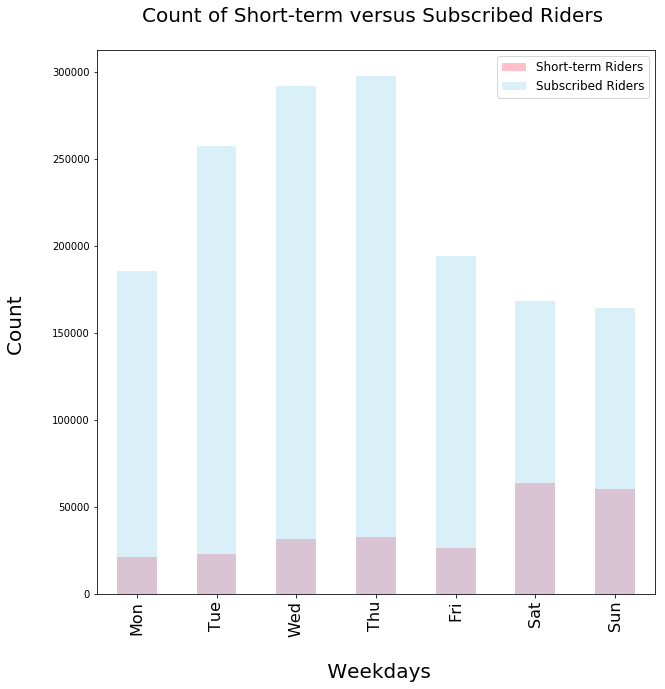

In [21]:
# Plot the porportation Customer vs Subscriber on different days (from Monday to Sunday)
# Colour Dictionary: https://en.wikipedia.org/wiki/Web_colors
# Plot dictionary: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html
plotbiker = pl.figure(figsize=(10,10))

set1 = CN.plot(kind='bar', color='#FFC0CB', label='Short-term Riders')
set2 = SN.plot(kind='bar', color='#87CEEB', label='Subscribed Riders', alpha=0.3)
set1.xaxis.set_ticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], fontsize=16)
#set2.xaxis.set_ticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], fontsize=16)
set1.set_xlabel('\n Weekdays', fontsize=20)
set1.set_ylabel('Count \n', fontsize=20)
set1.set_title('Count of Short-term versus Subscribed Riders \n', fontsize = 20)
pl.legend(fontsize=12)

## Figure 1a: 
The plot shows the absolute count for short-term riders (customers) throughout the week. In contrast, subscibers counts are also demonstrated. We can see the counts goes up during the weekends for short-term riders comparing to subscribers' count going down during weekends. In general we can see that there are way more subscribers using Citibikes than short-term riders which can be due to, many short-term riders are considered tourists and they are possibly not very familiar with the road condition in NYC so prefer to take public transit. 

## Normalize the counts by Total Riders

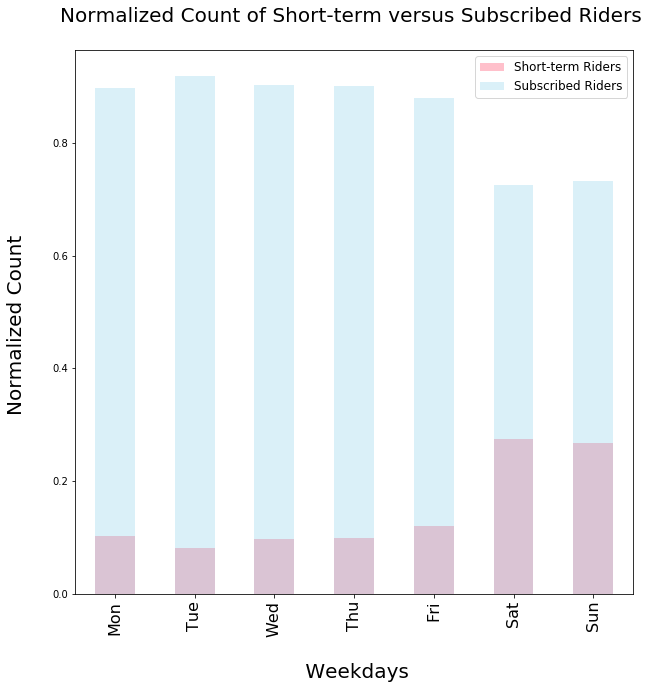

In [22]:
# Normalize the customer of each day count by total riders of each day
# Plot the porportation Customer vs Subscriber on different days (from Monday to Sunday)

plotbikerNT = pl.figure(figsize=(10,10))

# Set up the formula for usertype count normalized by all the riders on each day
RatioNC = CN/RiderD
RatioNS = SN/RiderD

# Plotting
setNT1 = RatioNC.plot(kind='bar', color='#FFC0CB', label='Short-term Riders')
setNT2 = RatioNS.plot(kind='bar', color='#87CEEB', label='Subscribed Riders', alpha=0.3)
setNT1.xaxis.set_ticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], fontsize=16)
setNT2.xaxis.set_ticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], fontsize=16)
setNT1.set_xlabel('\n Weekdays', fontsize=20)
setNT2.set_ylabel('Normalized Count \n', fontsize=20)
setNT1.set_title('Normalized Count of Short-term versus Subscribed Riders \n', fontsize = 20)
pl.legend(fontsize=12)

## Figure 1b: 
The plot shows the normalized count for short-term riders (customers) throughout the week. In contrast, subscibers normalized counts are also demonstrated. We can see the normalized counts goes up during the weekends for short-term riders, comparing to subscribers' normalized count decreased over the weekends. 

## Normalize the counts by standard errors


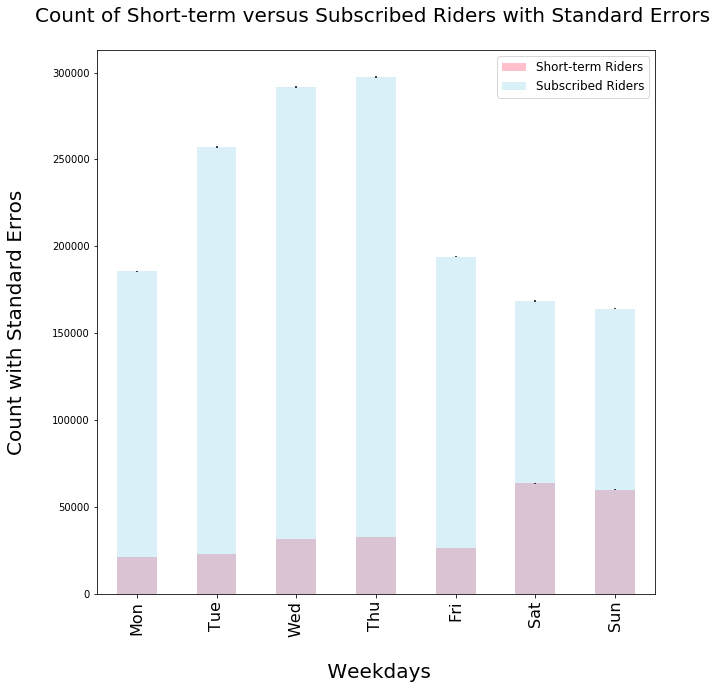

In [32]:
# Normalize the customer count by total riders
# Plot the porportation Customer vs Subscriber on different days (from Monday to Sunday)

plotbikerSE = pl.figure(figsize=(10,10))

# Set up the formula for usertype standard error all the riders on each day
SE=np.sqrt(RiderD)
SENC = CN/SE
SENS = SN/SE

# Plotting
setNT1 = CN.plot(kind='bar', yerr =[SENC, SENC], color='#FFC0CB', label='Short-term Riders')
setNT2 = SN.plot(kind='bar', yerr =[SENS, SENS], color='#87CEEB', label='Subscribed Riders', alpha=0.3)
setNT1.xaxis.set_ticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], fontsize=16)
setNT2.xaxis.set_ticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], fontsize=16)
setNT1.set_xlabel('\n Weekdays', fontsize=20)
setNT2.set_ylabel('Count with Standard Erros\n', fontsize=20)
setNT1.set_title('Count of Short-term versus Subscribed Riders with Standard Errors \n', fontsize = 20)
pl.legend(fontsize=12)

## Figure 1c: 
This figure shows the counts applied with standard errors. 